<a href="https://colab.research.google.com/github/JoanNjoki/Data_Analysis_using_KNN-_and_Naive_Bayes/blob/main/Spam_Moringa_Data_Science_Core_W9_Independent_Project_2021_06_Joan_Mwangi_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spam Mail Data Analysis

## 1. Defining the Question

### a)  The Question

> The rise in junk mail (or commonly referred to as spam) in our email boxes creates a need to use machine learning to filter unwarranted mails. Basing it on features provided within this  dataset, I'll predict whether or not a mail is spam or a ham(solicited email).

### b)  Metric for Success

> To make a successful prediction based on the accuracy score attained from the various train and test splits.

### c) Context 

> There is a surge of mails coming through the mail boxes that arent warranted by the user. Words such as buy now, act now, click here and get it now fill the mail boxes. Correctly classifying emails that should land in spam mails and those that dont saves time for the user. Reducing false positives is required as mails that arent spam can be stored in the spam category making the user miss out on vital information.

### d)  Experimental Design

> #### These are the steps I'll use in my analysis:
* Importing the necessary libraries
* Loading the dataset
* Peform data cleaning
* Carrying out exploratory data analysis
* Fitting the model and making predictions
* Challenging the solution
* Making a conclusion based on the analysis

### e) Data Relevance

> Features such as word frequency are essential in identifying the probability of classifying a mail as spam or ham. This analysis is also vital as businesses depend on accessing important information without going through piles of unnecessary junk mails. 

## 2. Reading the Data

In [2]:
#loading libraries into the environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading the dataset into environment
spam = pd.read_csv('/content/spambase.data')


In [44]:
with open('/content/spambase.names') as names:
  print(names.read())
spam.columns = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business',
             'word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology',
              'word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest','capital_run_length_total','spam_or_not']

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of



## 3. Checking the Data

In [14]:
# Determining the no. of records in our dataset
#
print('This dataset has ' + str(spam.shape) + ' rows and columns')

This dataset has (4600, 58) rows and columns


In [15]:
# Previewing the last rows
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_or_not
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [16]:
# Previewing the last five rows
spam.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_or_not
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [17]:
#checking the datatype
spam.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

## 4. Tidying the Dataset

In [ ]:
# Checking for the number of columns within the dataset
#
len(spam.columns)

58

In [18]:
# Identifying the Missing Data
spam.isnull().sum().sum()
#no null values

0

In [19]:
#checking for duplicates
spam.duplicated().sum()

391

In [20]:
#dropping duplicates and keeping the first values
spam = spam.drop_duplicates(keep='first')
#confirming they have been dropped
spam.duplicated().sum()

0

In [21]:
#checking for binary values within in the predictor column
print(spam['spam_or_not'].nunique())
print(spam['spam_or_not'].unique())

2
[1 0]


In [22]:
#descriptive statistics
spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_or_not
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000,4209.000000
mean,0.104391,0.112530,0.291390,0.063093,0.325322,0.096679,0.117503,0.108026,0.091882,0.248479,0.056700,0.565187,0.097679,0.061226,0.044813,0.253813,0.149190,0.188494,1.718318,0.084982,0.810005,0.131618,0.100646,0.090991,0.574132,0.279397,0.369926,0.128605,0.098406,0.103804,0.063559,0.044928,0.102357,0.045788,0.107907,0.099392,0.143516,0.014193,0.084077,0.061292,0.041442,0.141575,0.048784,0.085286,0.320200,0.189420,0.005788,0.034754,0.040413,0.144082,0.017380,0.281018,0.076075,0.045809,5.384282,52.137800,291.18508,0.398670
std,0.300036,0.454241,0.515752,1.352647,0.687887,0.276059,0.397327,0.410328,0.282174,0.656705,0.184186,0.882617,0.309342,0.346106,0.242214,0.797629,0.457718,0.540931,1.768967,0.505641,1.149486,1.071384,0.351375,0.431772,1.676715,0.905650,1.775532,0.535489,0.576863,0.439618,0.387312,0.300783,0.569211,0.301847,0.530323,0.386513,0.424553,0.230539,0.448043,0.319556,0.318214,0.793895,0.231898,0.646171,1.046027,0.928413,0.079180,0.298556,0.252562,0.274280,0.105743,0.843387,0.239734,0.435976,33.151287,199.605834,618.72831,0.489683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627000,7.000000,40.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.360000,0.000000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

## 5. Exploratory Analysis

##Univariate Analysis

###Histograms

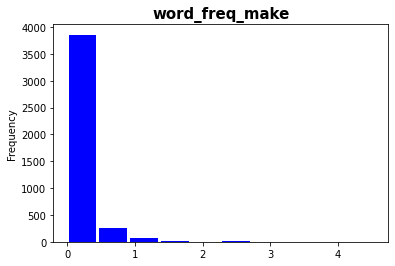

In [24]:
#plotting the histogram word_freq_make
spam['word_freq_make'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_make',fontsize=15,color='black',weight='bold')
plt.show()

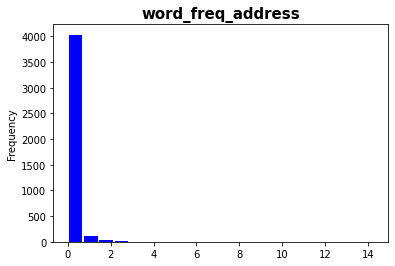

In [25]:
#plotting the histogram word_freq_address
spam['word_freq_address'].plot.hist(bins=20,rwidth=0.9,color='blue')
plt.title('word_freq_address',fontsize=15,color='black',weight='bold')
plt.show()

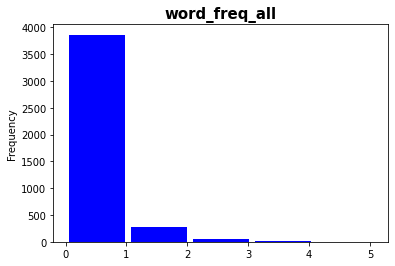

In [26]:
#plotting the histogram word_freq_all
spam['word_freq_all'].plot.hist(bins=5,rwidth=0.9,color='blue')
plt.title('word_freq_all',fontsize=15,color='black',weight='bold')
plt.show()

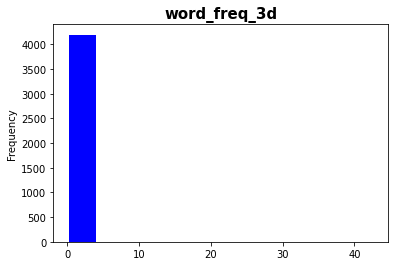

In [31]:
#plotting the histogram word_freq_3d
spam['word_freq_3d'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_3d',fontsize=15,color='black',weight='bold')
plt.show()

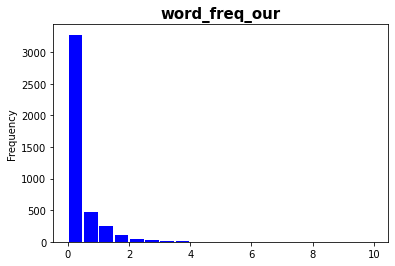

In [45]:
#plotting histogram word_freq_our
spam['word_freq_our'].plot.hist(bins=20,rwidth=0.9,color='blue')
plt.title('word_freq_our',fontsize=15,color='black',weight='bold')
plt.show()

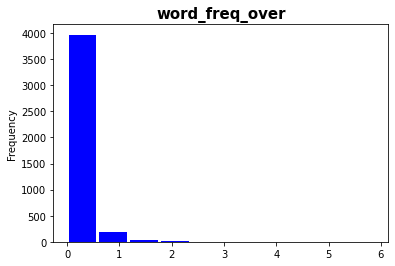

In [33]:
#plotting histogram word_freq_over
spam['word_freq_over'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_over',fontsize=15,color='black',weight='bold')
plt.show()

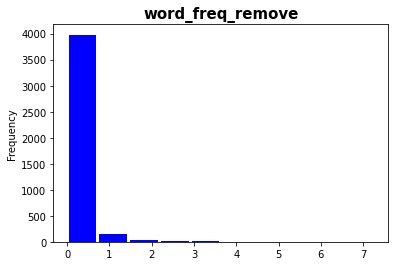

In [34]:
#plotting histogram:0.2
spam['word_freq_remove'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_remove',fontsize=15,color='black',weight='bold')
plt.show()

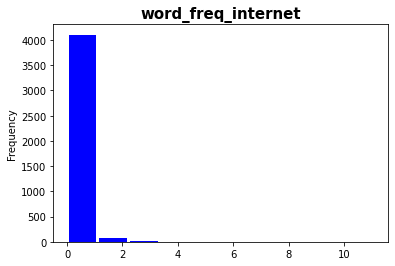

In [35]:
#plotting histogram:word_freq_internet
spam['word_freq_internet'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_internet',fontsize=15,color='black',weight='bold')
plt.show()

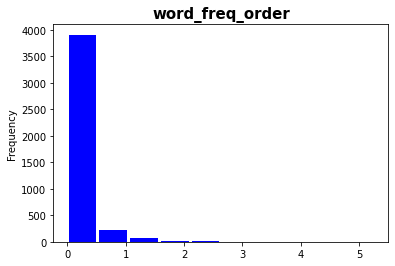

In [36]:
#plotting histogram:word_freq_order
spam['word_freq_order'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_order',fontsize=15,color='black',weight='bold')
plt.show()

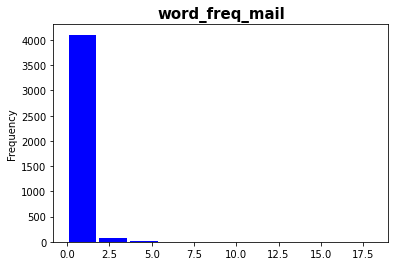

In [37]:
#plotting histogram:word_freq_mail
spam['word_freq_mail'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_mail',fontsize=15,color='black',weight='bold')
plt.show()

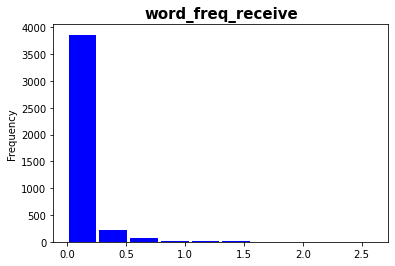

In [38]:
#plotting histogram:word_freq_receive
spam['word_freq_receive'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_receive',fontsize=15,color='black',weight='bold')
plt.show()

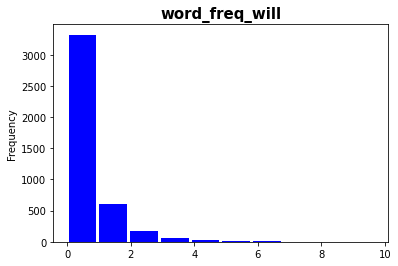

In [39]:
#plotting histogram:word_freq_will
spam['word_freq_will'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_will',fontsize=15,color='black',weight='bold')
plt.show()

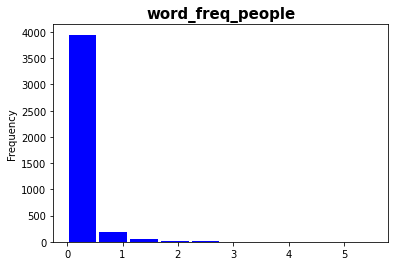

In [40]:
#plotting histogram:word_freq_people
spam['word_freq_people'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_people',fontsize=15,color='black',weight='bold')
plt.show()

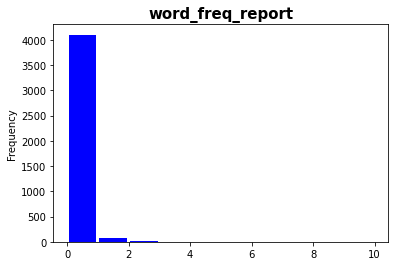

In [41]:
#plotting histogram:word_freq_report
spam['word_freq_report'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_report',fontsize=15,color='black',weight='bold')
plt.show()

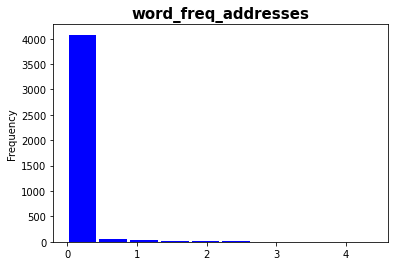

In [46]:
#plotting histogram:0.9
spam['word_freq_addresses'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_addresses',fontsize=15,color='black',weight='bold')
plt.show()

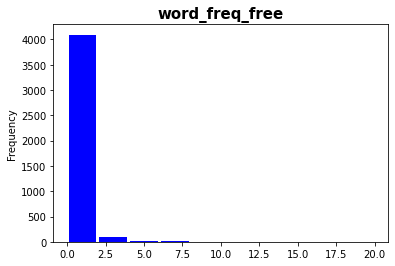

In [47]:
#plotting histogram:word_freq_free
spam['word_freq_free'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_free',fontsize=15,color='black',weight='bold')
plt.show()

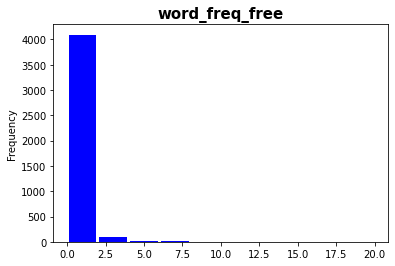

In [48]:
#plotting histogram:word_freq_free
spam['word_freq_free'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_free',fontsize=15,color='black',weight='bold')
plt.show()

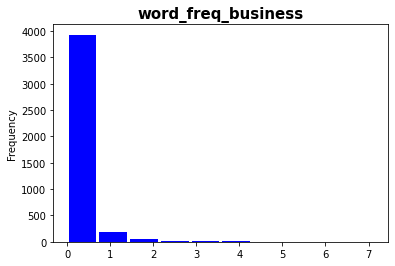

In [49]:
#plotting histogram:0.11
spam['word_freq_business'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_business',fontsize=15,color='black',weight='bold')
plt.show()

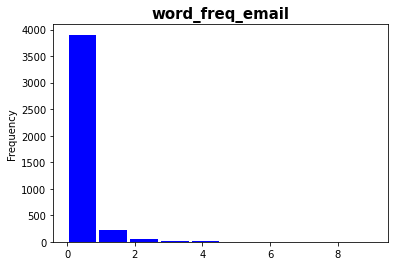

In [50]:
#plotting histogram:word_freq_email
spam['word_freq_email'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_email',fontsize=15,color='black',weight='bold')
plt.show()

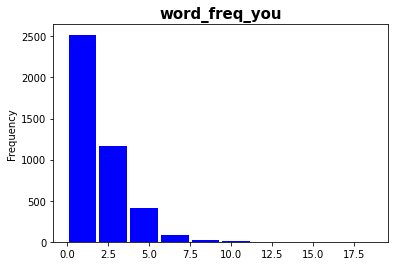

In [51]:
#plotting histogram:word_freq_you
spam['word_freq_you'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_you',fontsize=15,color='black',weight='bold')
plt.show()

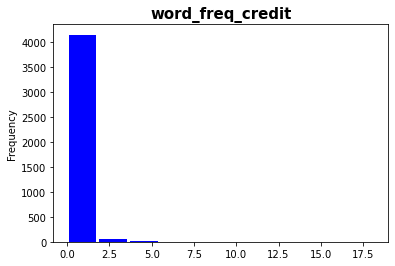

In [52]:
#plotting histogram:word_freq_credit
spam['word_freq_credit'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_credit',fontsize=15,color='black',weight='bold')
plt.show()

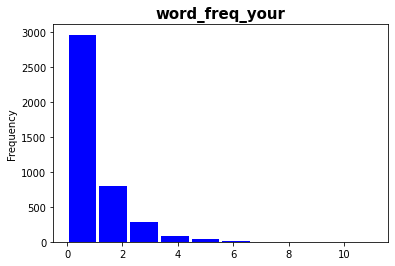

In [53]:
#plotting histogram:word_freq_your
spam['word_freq_your'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_your',fontsize=15,color='black',weight='bold')
plt.show()

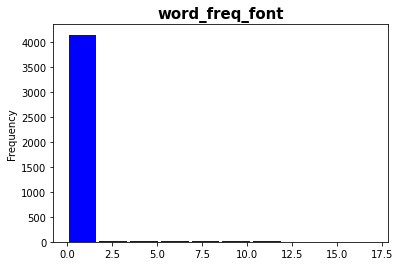

In [54]:
#plotting histogram:word_freq_font
spam['word_freq_font'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_font',fontsize=15,color='black',weight='bold')
plt.show()

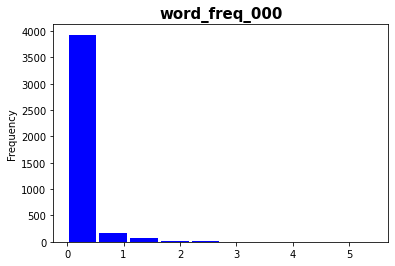

In [55]:
#plotting histogram:word_freq_000
spam['word_freq_000'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_000',fontsize=15,color='black',weight='bold')
plt.show()

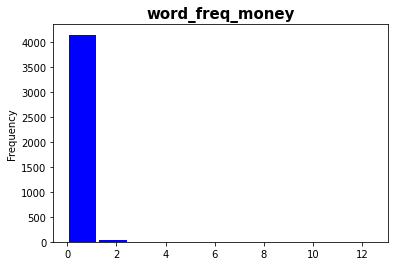

In [56]:
#plotting histogram:word_freq_money
spam['word_freq_money'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_money',fontsize=15,color='black',weight='bold')
plt.show()

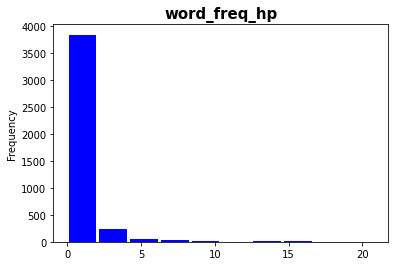

In [57]:
#plotting histogram:word_freq_hp
spam['word_freq_hp'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_hp',fontsize=15,color='black',weight='bold')
plt.show()

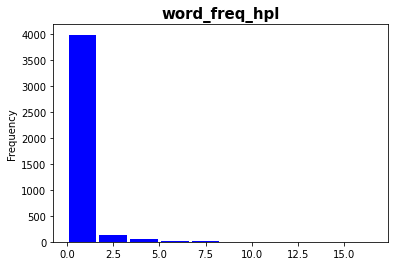

In [58]:
#plotting histogram:word_freq_hpl
spam['word_freq_hpl'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_hpl',fontsize=15,color='black',weight='bold')
plt.show()

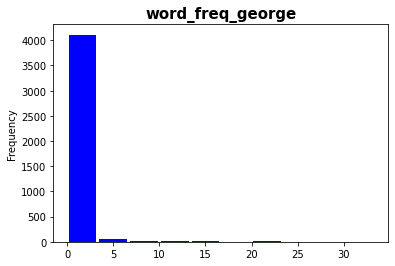

In [59]:
#plotting histogram:word_freq_george
spam['word_freq_george'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_george',fontsize=15,color='black',weight='bold')
plt.show()

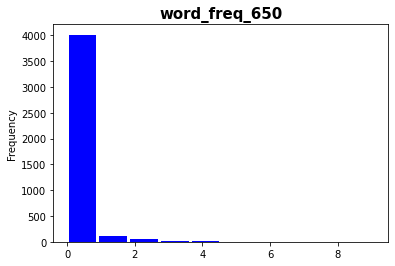

In [60]:
#plotting histogram:word_freq_650
spam['word_freq_650'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_650',fontsize=15,color='black',weight='bold')
plt.show()

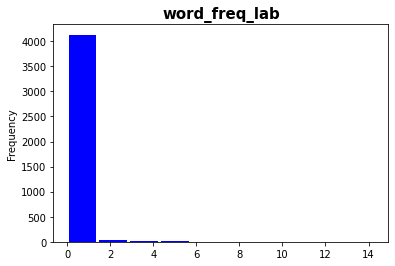

In [61]:
#plotting histogram:word_freq_lab
spam['word_freq_lab'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_lab',fontsize=15,color='black',weight='bold')
plt.show()

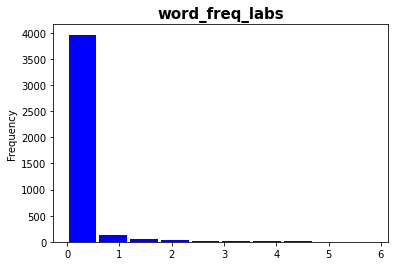

In [62]:
#plotting histogram:word_freq_labs
spam['word_freq_labs'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_labs',fontsize=15,color='black',weight='bold')
plt.show()

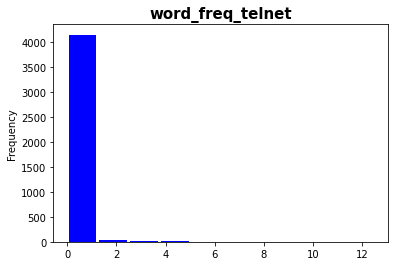

In [63]:
#plotting histogram:word_freq_telnet
spam['word_freq_telnet'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_telnet',fontsize=15,color='black',weight='bold')
plt.show()

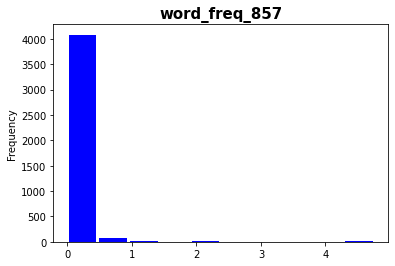

In [64]:
#plotting histogram:word_freq_857
spam['word_freq_857'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_857',fontsize=15,color='black',weight='bold')
plt.show()

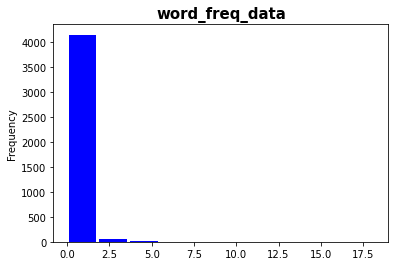

In [65]:
#plotting histogram:word_freq_data
spam['word_freq_data'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_data',fontsize=15,color='black',weight='bold')
plt.show()

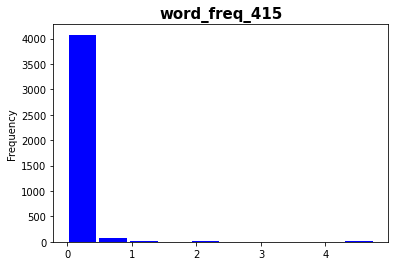

In [66]:
#plotting histogram:word_freq_415
spam['word_freq_415'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_415',fontsize=15,color='black',weight='bold')
plt.show()

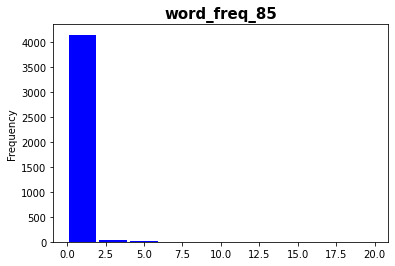

In [67]:
#plotting histogram:word_freq_85
spam['word_freq_85'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_85',fontsize=15,color='black',weight='bold')
plt.show()

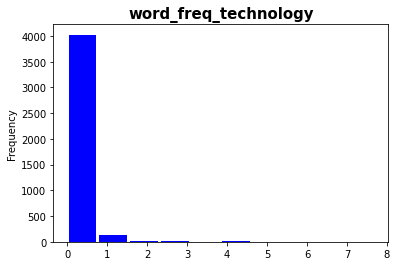

In [68]:
#plotting histogram:word_freq_technology
spam['word_freq_technology'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_technology',fontsize=15,color='black',weight='bold')
plt.show()

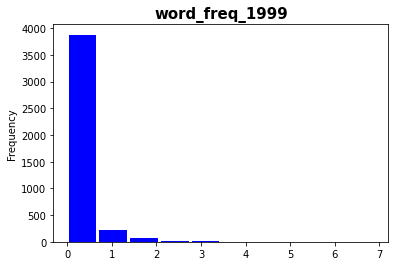

In [69]:
#plotting histogram:word_freq_1999
spam['word_freq_1999'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_1999',fontsize=15,color='black',weight='bold')
plt.show()

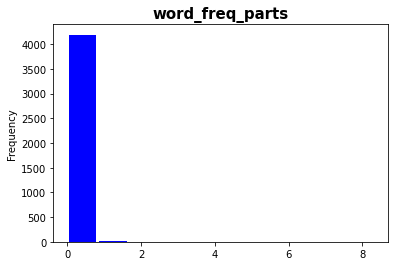

In [70]:
#plotting histogram:word_freq_parts
spam['word_freq_parts'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_parts',fontsize=15,color='black',weight='bold')
plt.show()

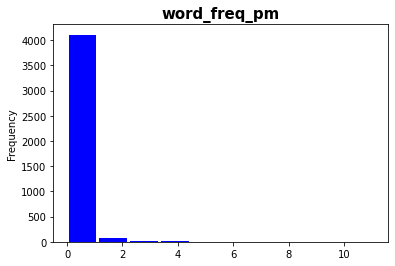

In [71]:
#plotting histogram:word_freq_pm
spam['word_freq_pm'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_pm',fontsize=15,color='black',weight='bold')
plt.show()

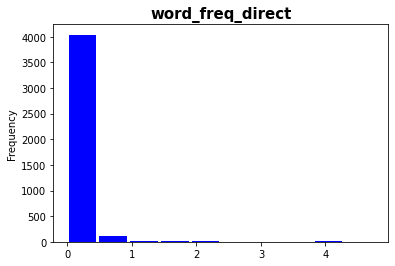

In [72]:
#plotting histogram:word_freq_direct
spam['word_freq_direct'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_direct',fontsize=15,color='black',weight='bold')
plt.show()

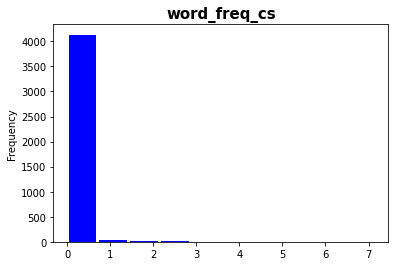

In [73]:
#plotting histogram:word_freq_cs
spam['word_freq_cs'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_cs',fontsize=15,color='black',weight='bold')
plt.show()

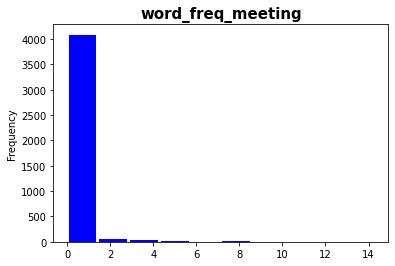

In [74]:
#plotting histogram:word_freq_meeting
spam['word_freq_meeting'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_meeting',fontsize=15,color='black',weight='bold')
plt.show()

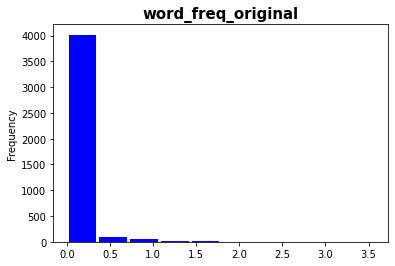

In [75]:
#plotting histogram:word_freq_original
spam['word_freq_original'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_original',fontsize=15,color='black',weight='bold')
plt.show()

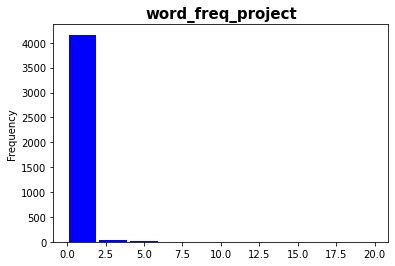

In [76]:
#plotting histogram:word_freq_project
spam['word_freq_project'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_project',fontsize=15,color='black',weight='bold')
plt.show()

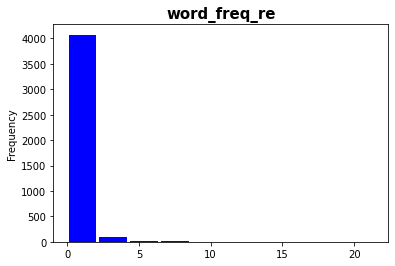

In [77]:
#plotting histogram:word_freq_re
spam['word_freq_re'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_re',fontsize=15,color='black',weight='bold')
plt.show()

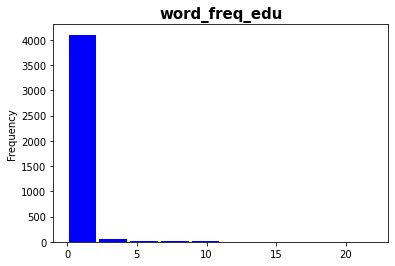

In [78]:
#plotting histogram:word_freq_edu
spam['word_freq_edu'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_edu',fontsize=15,color='black',weight='bold')
plt.show()

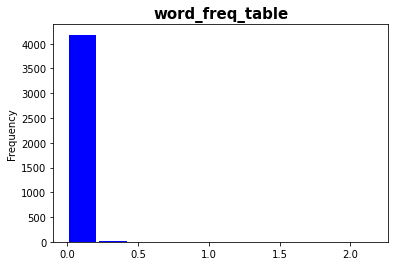

In [79]:
#plotting histogram:word_freq_table
spam['word_freq_table'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_table',fontsize=15,color='black',weight='bold')
plt.show()

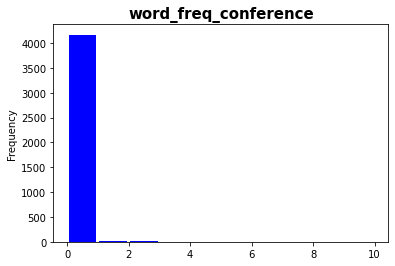

In [80]:
#plotting histogram:word_freq_conference
spam['word_freq_conference'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('word_freq_conference',fontsize=15,color='black',weight='bold')
plt.show()

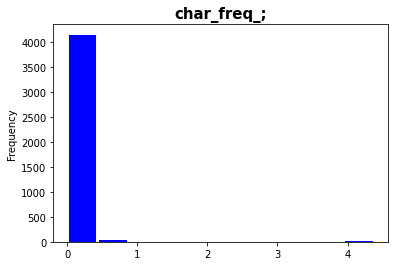

In [82]:
#plotting histogram:char_freq_;
spam['char_freq_;'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('char_freq_;',fontsize=15,color='black',weight='bold')
plt.show()

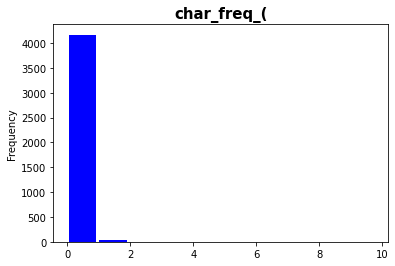

In [83]:
#plotting histogram:char_freq_(
spam['char_freq_('].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('char_freq_(',fontsize=15,color='black',weight='bold')
plt.show()

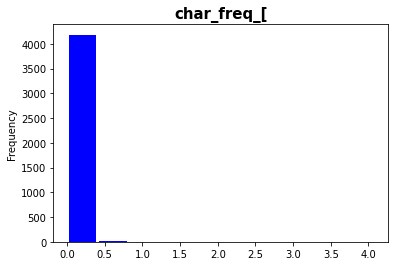

In [84]:
#plotting histogram:char_freq_[
spam['char_freq_['].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('char_freq_[',fontsize=15,color='black',weight='bold')
plt.show()

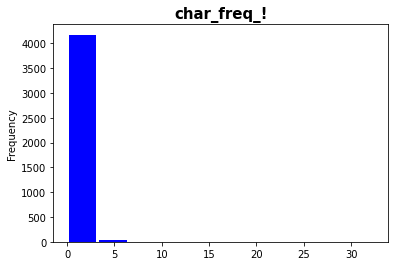

In [85]:
#plotting histogram:char_freq_!
spam['char_freq_!'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('char_freq_!',fontsize=15,color='black',weight='bold')
plt.show()

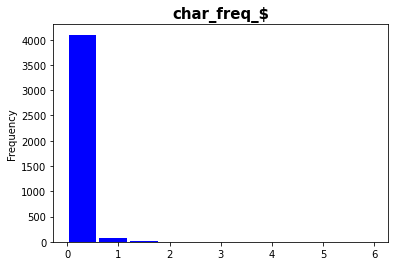

In [86]:
#plotting histogram:char_freq_$
spam['char_freq_$'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('char_freq_$',fontsize=15,color='black',weight='bold')
plt.show()

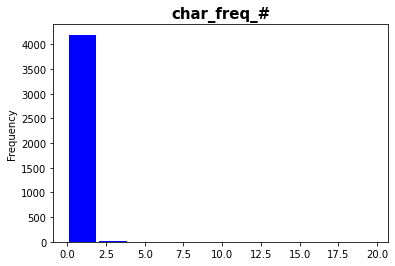

In [87]:
#plotting histogram:char_freq_#
spam['char_freq_#'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('char_freq_#',fontsize=15,color='black',weight='bold')
plt.show()

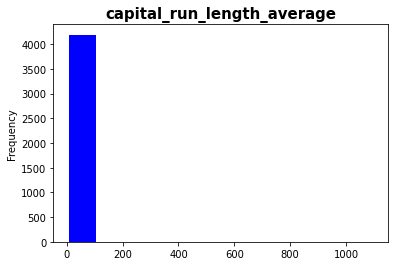

In [88]:
#plotting histogram:capital_run_length_average
spam['capital_run_length_average'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('capital_run_length_average',fontsize=15,color='black',weight='bold')
plt.show()

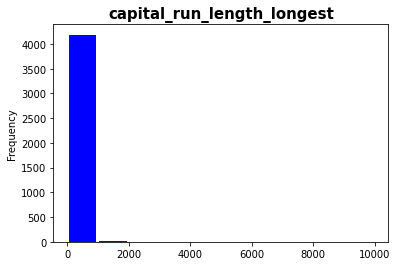

In [89]:
#plotting histogram:capital_run_length_longest
spam['capital_run_length_longest'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('capital_run_length_longest',fontsize=15,color='black',weight='bold')
plt.show()

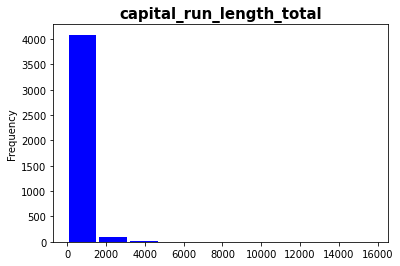

In [90]:
#plotting histogram:capital_run_length_total
spam['capital_run_length_total'].plot.hist(bins=10,rwidth=0.9,color='blue')
plt.title('capital_run_length_total',fontsize=15,color='black',weight='bold')
plt.show()

*Majority of the features within this dataset are skewed to the left*

###Bar graphs

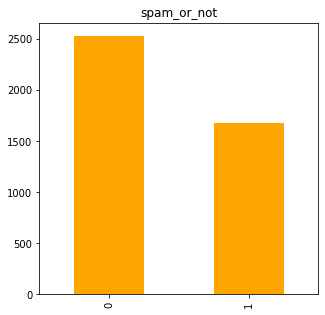

In [92]:
#bar graph of 1
spam['spam_or_not'].value_counts().plot(kind='bar', figsize=(5,5),title='spam_or_not',color='orange')
plt.show()

> *Majority of the values are 0 representing unsolicited emails*

## Bivariate Analysis

### Correlation matrix

In [93]:
#correlation matrix
corr = spam.corr()
corr

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_or_not
word_freq_make,1.000000,0.034114,0.063267,0.005384,0.021740,0.055040,0.011037,-0.004392,0.103818,0.040799,0.063007,0.075919,0.061960,0.032249,0.022439,0.065451,0.081447,0.051765,0.120575,0.020910,0.121471,-0.025585,0.126457,0.205676,-0.075085,-0.063494,-0.048104,-0.050075,-0.041556,-0.054262,-0.038913,-0.031647,-0.042731,-0.026335,-0.046101,-0.057318,-0.058801,-0.008632,-0.011215,-0.035484,-0.005291,-0.026562,-0.025621,-0.022991,-0.037874,-0.034472,-0.000956,-0.018914,-0.027262,-0.019680,-0.034798,0.059236,0.101934,-0.009158,0.044779,0.059132,0.084126,0.129321
word_freq_address,0.034114,1.000000,0.027609,-0.008936,0.036983,0.005623,0.077468,0.013781,0.053525,0.184441,0.060819,0.026228,0.015628,0.012465,0.061887,0.046615,0.022112,0.178408,0.055852,-0.006690,0.117780,0.001249,0.007145,0.061350,-0.053488,-0.044550,-0.011172,-0.032939,-0.026005,-0.029359,-0.015895,0.028897,-0.032530,0.026085,-0.025472,-0.028196,0.003843,-0.012693,-0.016159,0.002379,-0.019317,-0.035865,0.037745,-0.029024,0.020116,-0.025952,-0.012319,-0.020919,0.014782,-0.028209,-0.019394,0.031702,0.044449,0.030702,0.029373,0.053866,0.034601,0.100346
word_freq_all,0.063267,0.027609,1.000000,-0.019895,0.065681,0.066608,0.028630,0.007263,0.077618,0.025201,0.055700,0.065723,0.036484,0.004928,0.104609,0.061927,0.029889,0.110528,0.126490,0.030903,0.147883,-0.039446,0.106747,0.031186,-0.092635,-0.066418,-0.081269,-0.051435,-0.057823,-0.030483,-0.036585,-0.063558,-0.057977,-0.063396,-0.048938,-0.047555,-0.074279,0.031767,-0.017389,-0.045985,-0.030803,-0.007592,-0.052705,-0.056865,-0.056554,-0.060529,0.027397,-0.029448,-0.036754,-0.024462,-0.035780,0.097231,0.073000,-0.004503,0.095684,0.092511,0.051967,0.172193
word_freq_3d,0.005384,-0.008936,-0.019895,1.000000,0.000256,-0.009167,0.014286,0.003798,-0.001044,-0.003849,-0.013195,-0.018576,-0.013156,0.003377,0.005373,0.005799,-0.002831,0.016592,-0.009932,-0.005008,0.004578,0.030587,0.014712,0.025849,-0.015706,-0.014033,-0.009712,-0.010632,-0.007933,-0.010914,-0.007656,-0.006969,-0.008248,-0.006977,-0.005909,-0.006312,-0.007440,-0.002724,-0.004508,-0.007656,-0.006076,-0.008320,-0.009387,-0.006115,-0.013182,-0.009434,-0.003410,-0.001862,-0.000030,-0.011450,-0.007516,-0.003861,0.008269,0.000133,0.005754,0.022106,0.023784,0.056407
word_freq_our,0.021740,0.036983,0.065681,0.000256,1.000000,0.041392,0.135958,0.023410,0.014482,0.027232,0.079165,0.055008,0.020656,0.001586,0.048309,0.079199,0.137869,0.050814,0.083092,0.027838,0.142992,-0.022716,0.062136,0.000320,-0.076785,-0.079809,-0.062483,-0.064151,0.039627,-0.053614,-0.042054,-0.024256,-0.034750,-0.024556,-0.051059,-0.052211,-0.077684,0.133057,-0.045513,-0.017580,-0.052325,0.107706,-0.054583,0.002770,-0.049499,-0.083315,-0.028146,-0.035040,-0.035049,-0.054583,-0.027988,0.019205,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230117
word_freq_over,0.055040,0.005623,0.066608,-0.009167,0.041392,1.000000,0.046844,0.079683,0.097012,0.010068,0.056568,0.001589,0.067254,0.007918,0.139996,0.016688,0.057658,0.059395,0.083323,0.057489,0.105705,0.006859,0.181734,0.059413,-0.086713,-0.08954

> *No alarming correlation was found.*

## 6. Multinomial Naive Bayes Classifier

### **Baseline: without cross validation**

In [96]:
#splitting the dataset into train and test sets
x = spam.drop(['spam_or_not'],1)
y = spam['spam_or_not'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
#using Multinomial Naive bayes
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(x_train,y_train)
#prediction and evaluation
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = model.predict(x_test)
print('Accuracy {:2f}%'.format(accuracy_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))

Accuracy 81.472684%
[[419  64]
 [ 92 267]]


> Accuracy score attained is 81.47%, with 419 true positives, 64 false negatives, 92 false positives and 267 true negatives

### **Cross validation**

In [ ]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
print("Accuracy {:.2f}%".format(accuracy.mean()*100))
# Getting the variance in the accuracies so we will print the sd
print("\nStandard Deviation {:.2f}".format(accuracy.std()))


Accuracy 78.71%

Standard Deviation 0.02


> *Mean accuracy score for the 10 kfolds is 78.71% with a standard deviation of +/- 0.02*

In [ ]:
#finding parameters to optimize
MultinomialNB()

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

> *Parameters to search using GridSearch Cross Validation are: alpha, class_prior and fit_prior*

In [ ]:
alpha = [1,5,10,15,20]#a list of possible alphas
fit_prior = [True,False]#to learn or not to learn prior class probabilities
params = dict(alpha=alpha,fit_prior=fit_prior)
gridsearch = GridSearchCV(param_grid=params,estimator=model,cv=10,n_jobs=-1,scoring='accuracy')
gridsearch.fit(x_train,y_train)
#gridsearch.best_params_

GridSearchCV(cv=10, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [1, 5, 10, 15, 20],
                         'fit_prior': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
#getting the best accuracy score and best parameters
print('Best accuracy:{:2f}%'.format((gridsearch.best_score_)*100))
print('Best parameters ',gridsearch.best_params_)

Best accuracy:78.913911%
Best parameters  {'alpha': 1, 'fit_prior': False}


>  *After a grid search the best hyperparameters are: alpha set at 1 and fit_prior set at False*

###**With Cross Validation**

### **80/20 split**

In [ ]:
#splitting the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model2 = MultinomialNB(alpha=1,fit_prior=False)
model2.fit(x_train,y_train)
#evaluation and performance
y_pred = model2.predict(x_test)
print('Accuracy:{:2f}%'.format(accuracy_score(y_test,y_pred)*100))
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

Accuracy:81.116390%
Confusion matrix:  [[415  68]
 [ 91 268]]


> Results show that the level of accuracy attained is approx 81.11%, which is lower than without cross validation but higher than the mean of the 10 kfolds cross validation scores.
From the confusion matrix we get
* TN: 415
* FP: 68
* FN: 91
* TP: 268

###**70/30 split**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)
model3 = MultinomialNB(alpha=1,fit_prior=False)
model3.fit(x_train,y_train)
#evaluation and performance
y_pred = model3.predict(x_test)
print('Accuracy:{:2f}%'.format(accuracy_score(y_test,y_pred)*100))
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

Accuracy:80.680918%
Confusion matrix:  [[634 106]
 [138 385]]


> The results deduce that the level of accuracy attained is approx 80.68%, which is lower than without cross validation and the mean of the 10 kfolds cross validation scores.
From the confusion matrix we get
* TN: 634
* FP: 106
* FN: 138
* TP: 385

### **60/40 split**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.4)
model4 = MultinomialNB(alpha=1,fit_prior=False)
model4.fit(x_train,y_train)
#evaluation and performance
y_pred = model3.predict(x_test)
print('Accuracy:{:2f}%'.format(accuracy_score(y_test,y_pred)*100))
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

Accuracy:79.572447%
Confusion matrix:  [[838 150]
 [194 502]]


> Results show that the level of accuracy attained is approx 79.57%, which is lower than without cross validation but slightly higher than the mean of the 10 kfolds cross validation scores.
From the confusion matrix we get
* TN: 838
* FP: 150
* FN: 194
* TP: 502

## 7. Challenging the solution

##**Optimization technique: Dropping highly correlated features**

In [97]:
#dropping highly correlated variables
corr = spam.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
dropped_columns = [col for col in upper.columns if any(upper[col]>0.95)]
#dropping the features
spam =spam.drop(spam[dropped_columns],axis=1)

##**Normalizing the values within the dataset**

In [98]:
#scaling the observations to have the sum of their lengths=1
from sklearn.preprocessing import Normalizer
normalize = Normalizer(norm='l2')
x = spam.drop(['spam_or_not'],1)
y = spam['spam_or_not'].values
normalize.transform(x)

array([[2.03297105e-04, 2.71062806e-04, 4.84040726e-04, ...,
        4.95076854e-03, 9.77762266e-02, 9.95187732e-01],
       [2.59683978e-05, 0.00000000e+00, 3.07292708e-04, ...,
        4.25059392e-03, 2.09911216e-01, 9.77710178e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.81192865e-02, 2.04911354e-01, 9.78451717e-01],
       ...,
       [2.53812946e-03, 0.00000000e+00, 2.53812946e-03, ...,
        1.18784459e-02, 5.07625892e-02, 9.98330921e-01],
       [1.22759766e-02, 0.00000000e+00, 0.00000000e+00, ...,
        1.46672345e-02, 6.39373781e-02, 9.97423098e-01],
       [0.00000000e+00, 0.00000000e+00, 1.59858723e-02, ...,
        3.07420620e-02, 1.22968248e-01, 9.83745986e-01]])

### **Model prediction after optimization**

In [ ]:
#splitting the dataset using the 80-20 split as it achieved the highest score after cross validation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.naive_bayes import MultinomialNB
model5 = MultinomialNB(alpha=1,fit_prior=False)
model5.fit(x_train,y_train)
#evaluation and prediction
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = model5.predict(x_test)
print('Accuracy: {:2f}%'.format(accuracy_score(y_test,y_pred)*100))
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

Accuracy: 81.116390%
Confusion matrix:  [[415  68]
 [ 91 268]]


After normalizing and dropping highly correlated features, the accuracy score and the confusion matrix attained has achieved the same results of ~ 81.12%

> * Overall, 80-20 split without cross validation attained the highest score of approx 81.47%.
* After dividing the dataset into 10 kfolds, the mean accuracy score attained was 78.71%.
* After cross validation, and attaining the best hyperparameters the split that attained the highest score was 80 - 20 given that only the fit_prior changed from True to False
* Optimizing the features using normalization,doing a grid search and dropping highly correlated features in this case didn't increase the accuracy of the model nor reduce the number of false positives (since the aim is correctly classifying the mails that are considered as spam)

## 8. Follow up questions

### a). Did we have the right data?

> *The accuracy scores affirms that we had the right dataset.*

### b). Do we need other data to answer our question?

> *Dataset was enough to form an analysis, the only challenge was some  of the features  were a bit unclear on what they represented.*

### c). Did we have the right question?

> *We had the right question, the features within the dataset give insights if the mail was spam or solicited mail.*